In [1]:
import random

import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

import tengp
from gpbenchmarks import get_data


def pdivide(x, y):
    return np.divide(x, y, out=np.copy(x), where=x!=0)

def plog(x, y):
    return np.log(x, out=np.copy(x), where=x>0)

def psin(x, y):
    return np.sin(x)

def pcos(x, y):
    return np.cos(x)

def pow2(x, y):
    return x**2

def pow3(x, y):
    return x**3

def ptan(x, y):
    return np.tan(x)

def ptanh(x, y):
    return np.tanh(x)

def psqrt(x, y):
    return  np.sqrt(x)

def pexp(x, y):
    return np.exp(x)


funset = tengp.FunctionSet()
funset.add(np.add, 2)
funset.add(np.subtract, 2)
funset.add(np.multiply, 2)
funset.add(pdivide, 2)
funset.add(plog, 2)
funset.add(psin, 2)
funset.add(pcos, 2)

#     function set: +, -, *, /, sin, cos, tan, tanh, sqrt, exp, log, **2, **3
ext_funset = tengp.FunctionSet()
ext_funset.add(np.add, 2)
ext_funset.add(np.subtract, 2)
ext_funset.add(np.multiply, 2)
ext_funset.add(pdivide, 2)
ext_funset.add(psin, 2)
ext_funset.add(pcos, 2)
ext_funset.add(ptan, 2)
ext_funset.add(ptanh, 2)
ext_funset.add(psqrt, 2)
ext_funset.add(pexp, 2)
ext_funset.add(plog, 2)
ext_funset.add(pow2, 2)
ext_funset.add(pow3, 2)

params1d = tengp.Parameters(2, 1, 1, 50, funset, real_valued=True)
params2d = tengp.Parameters(3, 1, 1, 50, funset, real_valued=True)
params5d = tengp.Parameters(6, 1, 1, 50, ext_funset, real_valued=True)

functions = [('nguyenf4', params1d, [20, -1, 1]), ('nguyenf7', params1d, [20, 0, 2]), ('nguyenf10', params2d, [100, -1, 1]), ('korns12', params5d, [10000, -50, 50])]

In [2]:
import pygmo as pg

In [63]:
vectors = []
n_actives = []

class cost_function:
    def __init__(self, X, Y, params, bounds):
        self.params = params
        self.bounds = bounds
        self.X = X
        self.Y = Y
    
    def fitness(self, x):
        #vectors.append(x)
        #x[-1] = round(x[-1])
        
        individual = tengp.individual.NPIndividual(
            list(x), self.bounds, self.params
        )
        
        pred = individual.transform(self.X)
        
        #n_actives.append(len(individual.active_nodes))
        
        try:
            return [mean_squared_error(pred, self.Y)]
        except ValueError:
            return [10000000000]
        
    def get_bounds(self):
        lower = [0]*len(self.bounds)
        for i in range(len(lower)):
            if i % 3 == 0:
                lower[i] = self.bounds[i]
                continue
            if self.bounds[i] >= 5:
                lower[i] = self.bounds[i] - 5
            else:
                lower[i] = self.bounds[i]
                
        lower[-1] -= 5
        print(self.bounds)
        print(lower)
        return (lower, [b for b in self.bounds])

In [64]:
%%time
results = []
champions = []

for f in functions:
    print(f[0])
    x, y = get_data(f[0], *f[2])
    x = np.c_[np.ones(len(x)), x]
    bounds = tengp.individual.IndividualBuilder(f[1]).create().bounds[:]

    prob = pg.problem(cost_function(x, y, f[1], bounds))
    
    problem_results = []
    pg.set_global_rng_seed(42)
    for i in range(100):
        print(i, end=', ')
        algo = pg.algorithm(pg.pso(
            gen=200,
            eta1=0.1,
            eta2=4
#             omega=0.4,
#             max_vel=1
#             variant=1,
#             neighb_type=4
        ))
        algo.set_verbosity(1)
        pop = pg.population(prob, 50)
        pop = algo.evolve(pop)
        problem_results.append(pop.champion_f[0])
        champions.append(pop.champion_x)
    results.append(problem_results)
    

nguyenf4
[6, 1, 1, 6, 2, 2, 6, 3, 3, 6, 4, 4, 6, 5, 5, 6, 6, 6, 6, 7, 7, 6, 8, 8, 6, 9, 9, 6, 10, 10, 6, 11, 11, 6, 12, 12, 6, 13, 13, 6, 14, 14, 6, 15, 15, 6, 16, 16, 6, 17, 17, 6, 18, 18, 6, 19, 19, 6, 20, 20, 6, 21, 21, 6, 22, 22, 6, 23, 23, 6, 24, 24, 6, 25, 25, 6, 26, 26, 6, 27, 27, 6, 28, 28, 6, 29, 29, 6, 30, 30, 6, 31, 31, 6, 32, 32, 6, 33, 33, 6, 34, 34, 6, 35, 35, 6, 36, 36, 6, 37, 37, 6, 38, 38, 6, 39, 39, 6, 40, 40, 6, 41, 41, 6, 42, 42, 6, 43, 43, 6, 44, 44, 6, 45, 45, 6, 46, 46, 6, 47, 47, 6, 48, 48, 6, 49, 49, 6, 50, 50, 51]
[6, 1, 1, 6, 2, 2, 6, 3, 3, 6, 4, 4, 6, 0, 0, 6, 1, 1, 6, 2, 2, 6, 3, 3, 6, 4, 4, 6, 5, 5, 6, 6, 6, 6, 7, 7, 6, 8, 8, 6, 9, 9, 6, 10, 10, 6, 11, 11, 6, 12, 12, 6, 13, 13, 6, 14, 14, 6, 15, 15, 6, 16, 16, 6, 17, 17, 6, 18, 18, 6, 19, 19, 6, 20, 20, 6, 21, 21, 6, 22, 22, 6, 23, 23, 6, 24, 24, 6, 25, 25, 6, 26, 26, 6, 27, 27, 6, 28, 28, 6, 29, 29, 6, 30, 30, 6, 31, 31, 6, 32, 32, 6, 33, 33, 6, 34, 34, 6, 35, 35, 6, 36, 36, 6, 37, 37, 6, 38, 38, 6, 39, 3

KeyboardInterrupt: 

In [55]:
def plot_results(outs):
    costs = np.array(outs)
    print('min:', np.min(costs))
    print('mean:', np.mean(costs))
    print('median:', np.median(costs))
    print('variance:',np.var(costs))
    sns.distplot(costs, kde=False);

Nguyen4
min: 0.009734379046742476
mean: 0.27177508163335007
median: 0.20430736576923253
variance: 0.055370133609695574


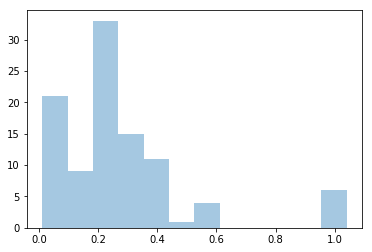

In [56]:
print('Nguyen4')
plot_results(results[0])

Nguyen7
min: 3.930932516333013e-05
mean: 0.00087633895052264
median: 0.0008649412731800418
variance: 1.5909907009250844e-07


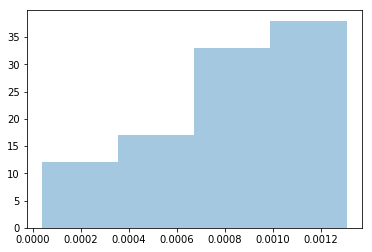

In [57]:
print('Nguyen7')
plot_results(results[1])

Nguyen10
min: 0.010118786835625613
mean: 0.04199458431152686
median: 0.03886650132533244
variance: 0.00013415301723684002


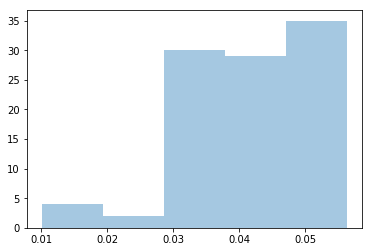

In [58]:
print('Nguyen10')
plot_results(results[2])

Korns12
min: 1.1126115244374697
mean: 2.1481580420293453
median: 2.321134298274283
variance: 0.1384027207588319


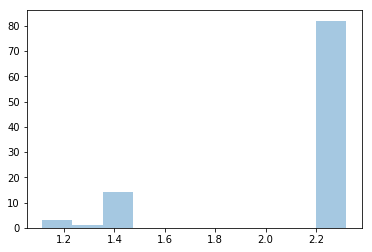

In [59]:
print('Korns12')
plot_results(results[3])